In [83]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nolds

In [84]:
def PI(original, shuffle):
    ApEn_max = max(original)
    ApEn_shuffle_max = np.array(shuffle.max())
    PI = ApEn_max/ApEn_shuffle_max
    return np.mean(PI), np.std(PI)
# def ApEn function
def ApEn(U, m, r) -> float:
    """Approximate_entropy."""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [
            len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0)
            for x_i in x
        ]
        return (N - m + 1.0) ** (-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [85]:
FRB20220912 = pd.read_csv('FRB20220912A-Table.csv')
FRB20220912

,Unnamed: 0,MJD,DM,DMError,Flux,FluxError,Width,PeakFrequency,PeakFrequencyError,BandWidth,...,Fluence,FluenceError,Energy,RM,RMErrorLeft,RMErrorRight,Linear,LinearError,Circular,CircularError
0,0,59880.49762,220.24,1.76,117.4,1.4,4.70,1479.5,5.4,122.4,...,0.552,0.007,39.79,-4.3,1.9,2.1,95.0,1.4,5.3,1.0
1,1,59880.49762,217.82,2.90,115.5,1.4,3.72,1366.2,4.3,231.4,...,0.429,0.005,30.97,-0.3,0.8,0.8,98.5,1.8,-16.9,1.3
2,2,59880.49768,221.87,0.06,242.8,3.0,4.09,1300.0,13.7,735.7,...,0.993,0.012,71.61,1.1,0.2,0.2,97.7,1.0,3.3,0.7
3,3,59880.49795,220.88,3.78,174.6,2.1,3.54,1381.0,6.8,321.4,...,0.619,0.008,44.63,0.5,0.5,0.5,98.6,1.4,-6.7,1.0
4,4,59880.49799,220.91,0.24,32.1,0.4,4.06,1095.7,11.2,251.7,...,0.130,0.002,9.40,-3.1,1.8,1.5,94.5,6.7,-16.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,59918.49904,219.71,0.29,21.7,0.3,1.23,1038.6,6.2,77.5,...,0.027,0.000,1.92,-24.3,15.4,15.0,114.8,20.1,-1.0,13.2
1072,1072,59918.49918,221.45,0.18,54.1,0.7,5.52,1088.2,4.3,207.3,...,0.298,0.004,21.52,-0.9,0.8,0.7,97.4,2.6,9.0,1.9
1073,1073,59935.37390,220.23,3.17,26.7,0.3,0.54,1007.3,12.1,55.0,...,0.014,0.000,1.04,-50.3,38.5,25.1,41.8,19.8,9.7,18.4
1074,1074,59935.37860,220.94,0.10,50.6,0.6,2.35,1032.4,10.9,214.1,...,0.119,0.002,8.58,-1.9,1.5,1.6,91.2,5.1,14.8,3.8


In [86]:
arrival_time = FRB20220912["MJD"].values
energy = FRB20220912["Energy"].values
center_frequency = FRB20220912["PeakFrequency"].values
FRB20220912["day"] = FRB20220912["MJD"].astype(int)

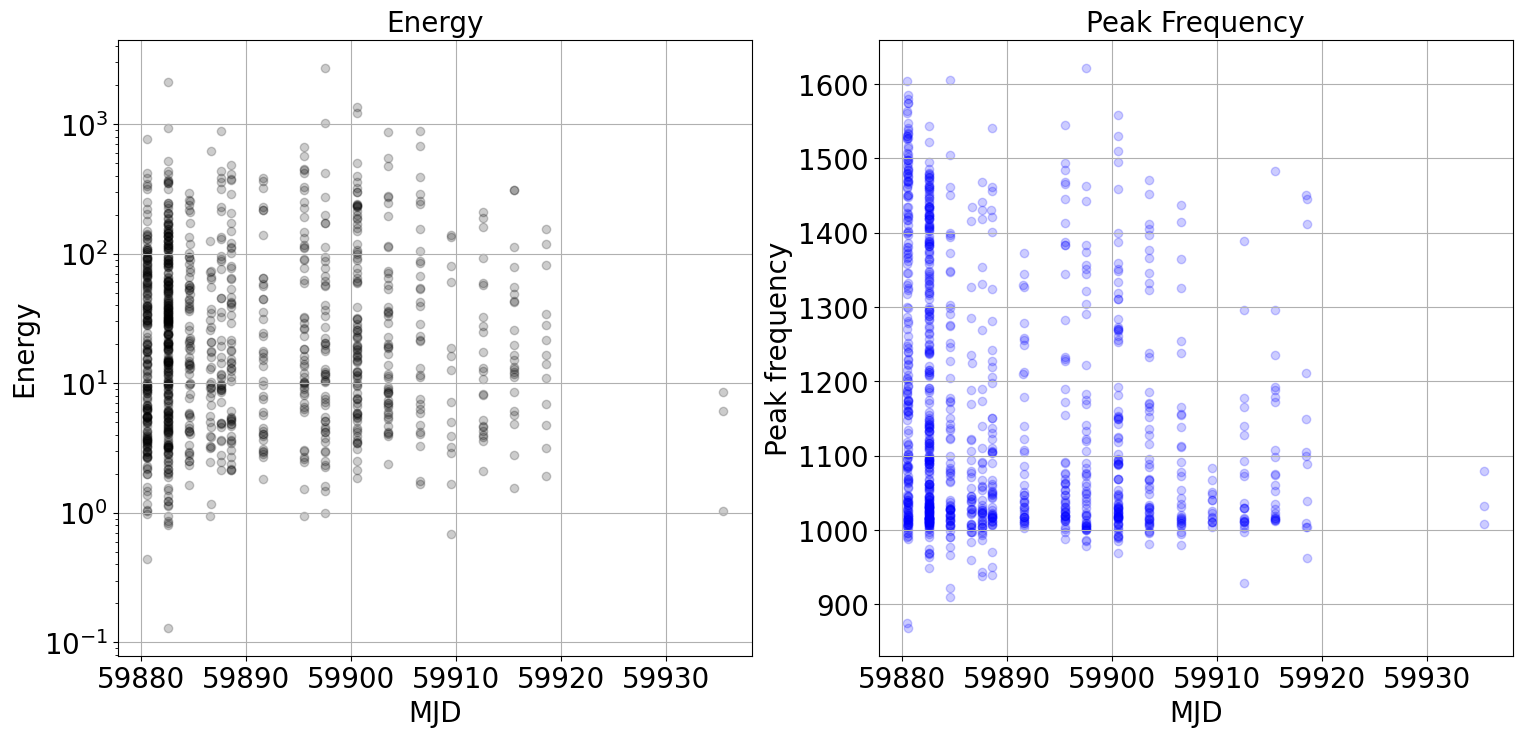

In [87]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
plt.scatter(arrival_time, energy, c='black', alpha=0.2)
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Energy',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
plt.yscale('log')
plt.grid(True)
plt.title("Energy",fontsize=20)

plt.subplot(1, 2, 2)
plt.scatter(arrival_time, center_frequency, c='blue', alpha=0.2)
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Peak frequency',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
# plt.yscale('log')
plt.grid(True)
plt.title("Peak Frequency",fontsize=20)

plt.show()


In [88]:
counter = Counter(FRB20220912["day"])
most_common_element = counter.most_common(1)[0]
second_most_common_element = counter.most_common(2)[1]
print("most number of burst",most_common_element,"second most burst", second_most_common_element)

most number of burst (59882, 277) second most burst (59880, 195)


In [89]:
FRB20220912_59882 = FRB20220912[FRB20220912["day"] == 59882]
FRB20220912_59880 = FRB20220912[FRB20220912["day"] == 59880]

In [90]:
arrival_time_59882 = FRB20220912_59882["MJD"].values
arrival_time_59880 = FRB20220912_59880["MJD"].values
energy_59882 = FRB20220912_59882["Energy"].values
energy_59880 = FRB20220912_59880["Energy"].values
center_frequency_59882 = FRB20220912_59882["PeakFrequency"].values
center_frequency_59880 = FRB20220912_59880["PeakFrequency"].values

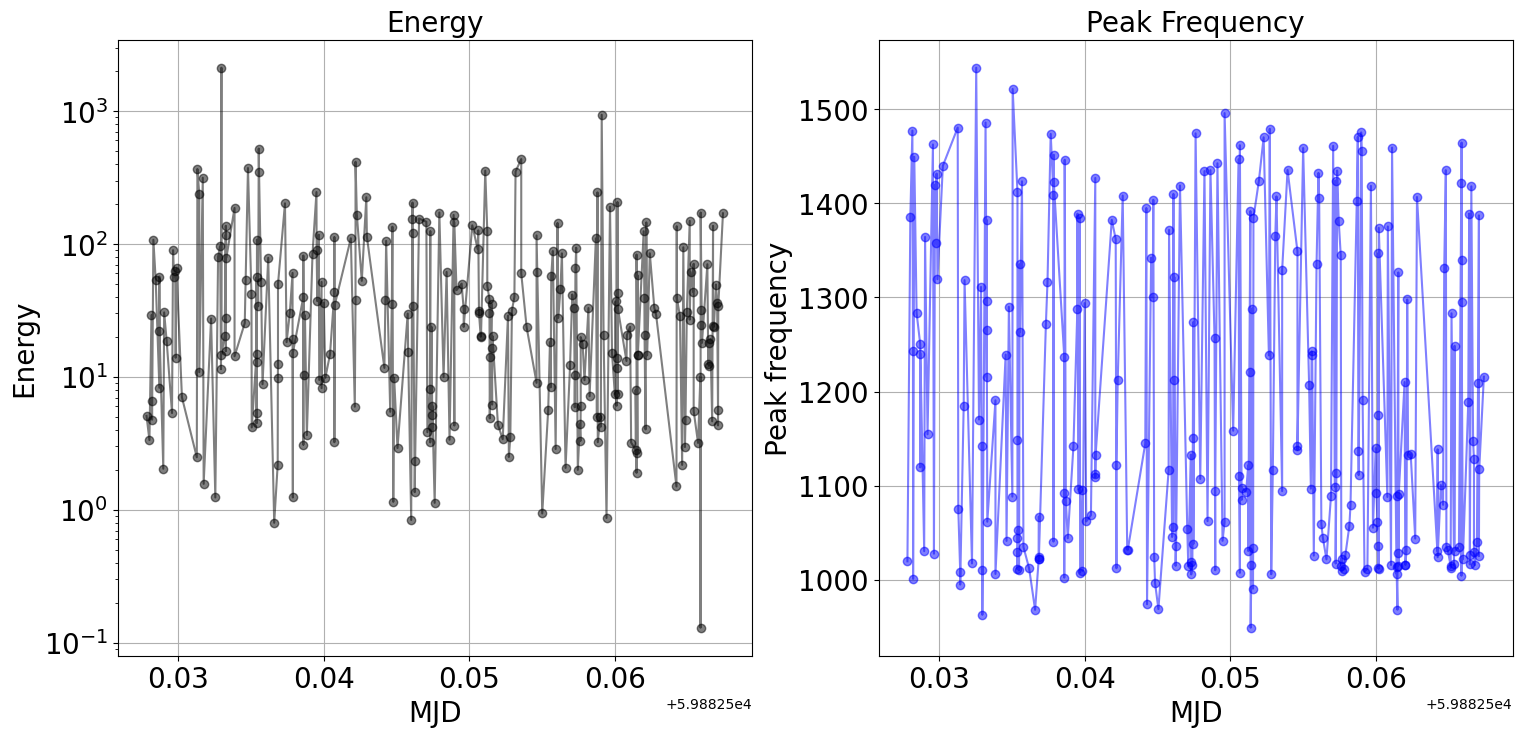

In [91]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
plt.plot(arrival_time_59882, energy_59882, c='black', alpha=0.5,marker='o')
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Energy',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
plt.yscale('log')
plt.grid(True)
plt.title("Energy",fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(arrival_time_59882, center_frequency_59882, c='blue', alpha=0.5,marker='o')
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Peak frequency',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
# plt.yscale('log')
plt.grid(True)
plt.title("Peak Frequency",fontsize=20)

plt.show()

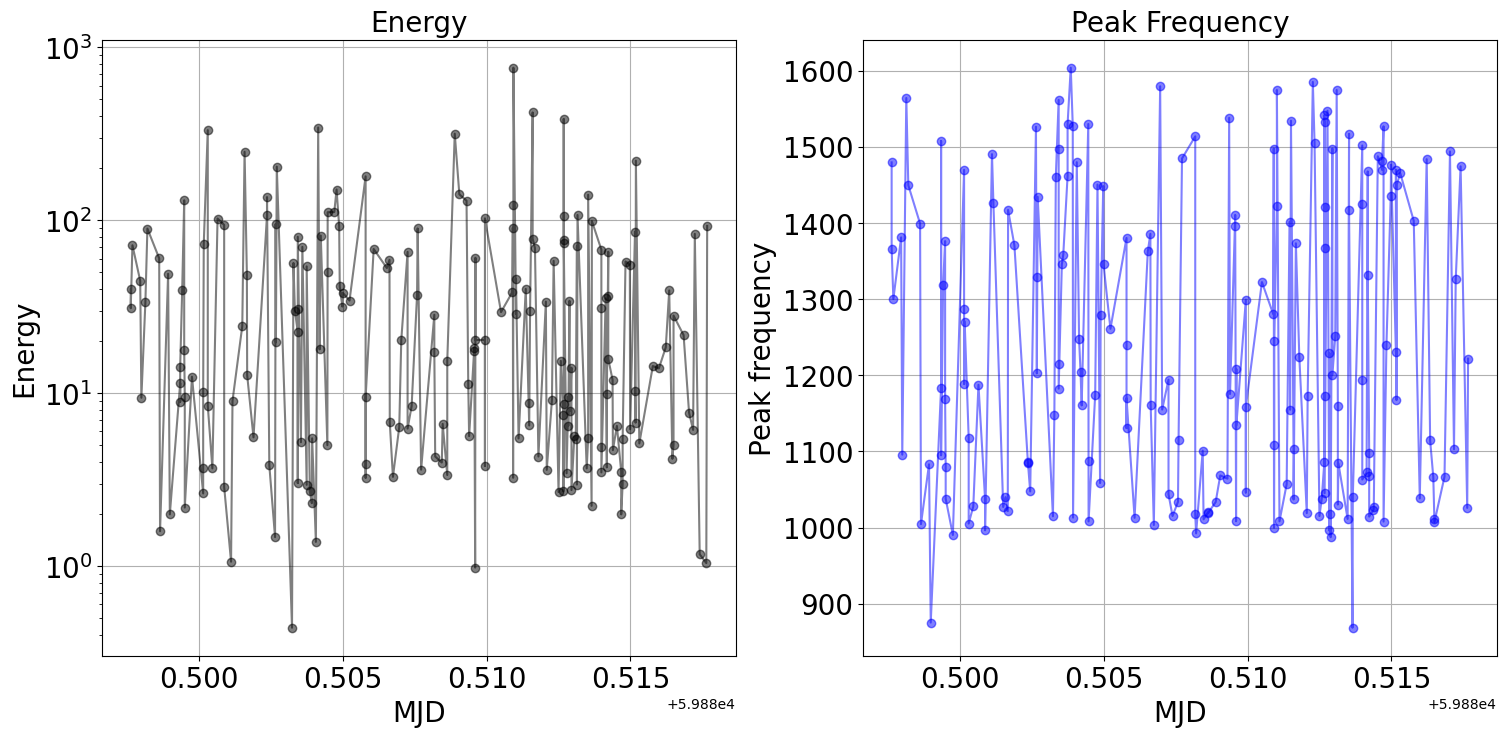

In [92]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
plt.plot(arrival_time_59880, energy_59880, c='black', alpha=0.5,marker='o')
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Energy',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
plt.yscale('log')
plt.grid(True)
plt.title("Energy",fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(arrival_time_59880, center_frequency_59880, c='blue', alpha=0.5,marker='o')
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Peak frequency',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
# plt.yscale('log')
plt.grid(True)
plt.title("Peak Frequency",fontsize=20)

plt.show()

In [93]:
waiting_time_59882 = []
for i in range(len(arrival_time_59882)-1):
    waiting_time_59882.append(arrival_time_59882[i+1] - arrival_time_59882[i])
waiting_time_59882 = np.array(waiting_time_59882)/np.mean(waiting_time_59882)

In [94]:
waiting_time_59880 = []
for i in range(len(arrival_time_59880)-1):
    waiting_time_59880.append(arrival_time_59880[i+1] - arrival_time_59880[i])
waiting_time_59880 = np.array(waiting_time_59880)/np.mean(waiting_time_59880)

In [95]:
energy_change_59882 = []
for i in range(len(energy_59882)-1):
    energy_change_59882.append(energy_59882[i+1] - energy_59882[i])
energy_change_59882 = np.array(energy_change_59882)/np.mean(energy_change_59882)

In [96]:
energy_change_59880 = []
for i in range(len(energy_59880)-1):
    energy_change_59880.append(energy_59880[i+1] - energy_59880[i])
energy_change_59880 = np.array(energy_change_59880)/np.mean(energy_change_59880)

In [97]:
freq_change_59882 = []
for i in range(len(center_frequency_59882)-1):
    freq_change_59882.append(center_frequency_59882[i+1] - center_frequency_59882[i])
freq_change_59882 = np.array(freq_change_59882)/np.mean(freq_change_59882)

In [98]:
freq_change_59880 = []
for i in range(len(center_frequency_59880)-1):
    freq_change_59880.append(center_frequency_59880[i+1] - center_frequency_59880[i])
freq_change_59880 = np.array(freq_change_59880)/np.mean(freq_change_59880)

In [99]:
print("LLE time series 59882:", nolds.lyap_e(waiting_time_59882))
print("LLE time series 59880:", nolds.lyap_e(waiting_time_59880))
print("LLE energy series 59882:", nolds.lyap_e(energy_change_59882))
print("LLE energy series 59880:", nolds.lyap_e(energy_change_59880))
print("LLE frequency series 59882:", nolds.lyap_e(freq_change_59882))
print("LLE frequency series 59880:", nolds.lyap_e(freq_change_59880))

LLE time series 59882: [ 0.07971505  0.01140863 -0.07989655 -0.2432635 ]
LLE time series 59880: [ 0.04933355 -0.01812037 -0.08530661 -0.20045203]
LLE energy series 59882: [ 0.12332249  0.02591205 -0.07716034 -0.28572837]
LLE energy series 59880: [ 0.10895094 -0.00276963 -0.05394961 -0.23618309]
LLE frequency series 59882: [ 0.05114685  0.00238992 -0.06902245 -0.21382333]
LLE frequency series 59880: [ 0.05246435 -0.01912663 -0.10916492 -0.22564672]


In [100]:
r_t_59882 = np.linspace(0, np.std(waiting_time_59882), 100)
wt_apen_59882 = []
for r in r_t_59882:
    wt_apen_59882.append(ApEn(waiting_time_59882, 2, r))
wt_apen_59882 = np.array(wt_apen_59882)

In [101]:
r_t_59880 = np.linspace(0, np.std(waiting_time_59880), 100)
wt_apen_59880 = []
for r in r_t_59880:
    wt_apen_59880.append(ApEn(waiting_time_59880, 2, r))
wt_apen_59880 = np.array(wt_apen_59880)

In [102]:
# # shuffle waiting time
# Adt_result_59882 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(waiting_time_59882)
#     apen = [ApEn(waiting_time_59882, 2, r) for r in r_t_59882]
#     Adt_result_59882[f'iteration_{i+1}'] = apen
# Adt_result_59882

In [103]:
# Adt_result_59880 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(waiting_time_59880)
#     apen = [ApEn(waiting_time_59880, 2, r) for r in r_t_59880]
#     Adt_result_59880[f'iteration_{i+1}'] = apen
# Adt_result_59880

In [104]:
# Adt_result_59882.to_csv('Adt_results_59882.csv',index=False)
# Adt_result_59880.to_csv('Adt_results_59880.csv',index=False)

In [105]:
Adt_result_59882 = pd.read_csv('Adt_results_59882.csv')
Adt_result_59880 = pd.read_csv('Adt_results_59880.csv')

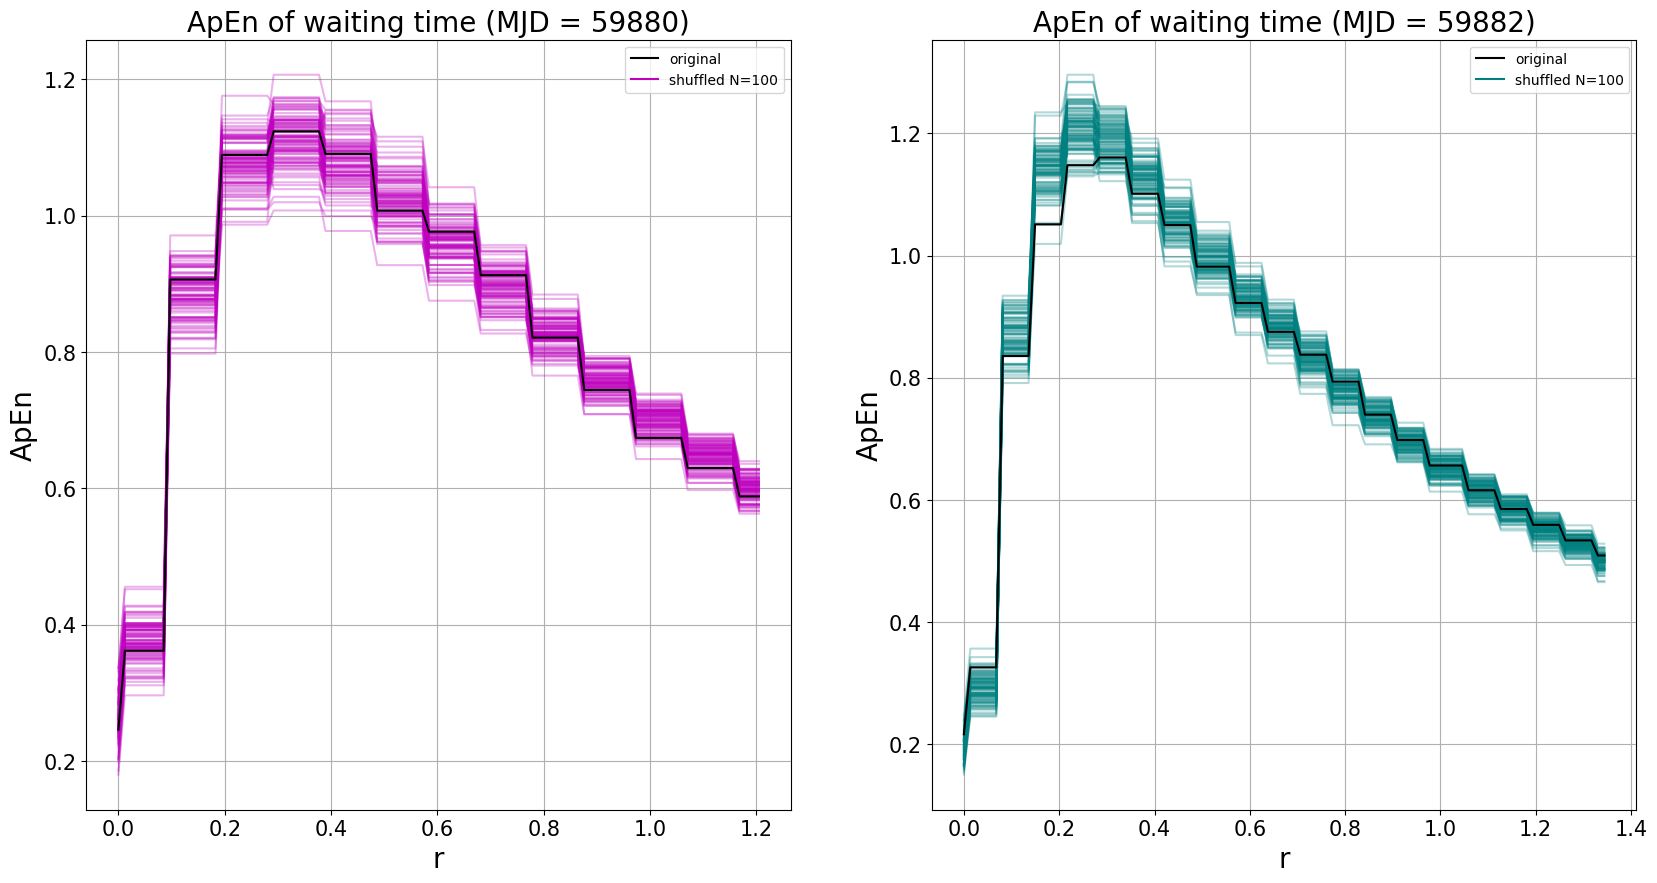

In [106]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(r_t_59880,Adt_result_59880 , c='m', alpha=0.3)
plt.plot(r_t_59880, wt_apen_59880, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='m')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of waiting time (MJD = 59880)',fontsize=20)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r_t_59882,Adt_result_59882 , c='teal', alpha=0.3)
plt.plot(r_t_59882, wt_apen_59882, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='teal')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of waiting time (MJD = 59882)',fontsize=20)
plt.grid(True)

plt.legend()
plt.show()

In [107]:
r_E_59882 = np.linspace(0, np.std(energy_change_59882), 100)
E_apen_59882 = []
for r in r_E_59882:
    E_apen_59882.append(ApEn(energy_change_59882, 2, r))
E_apen_59882 = np.array(E_apen_59882)

In [108]:
r_E_59880 = np.linspace(0, np.std(energy_change_59880), 100)
E_apen_59880 = []
for r in r_E_59880:
    E_apen_59880.append(ApEn(energy_change_59880, 2, r))
E_apen_59880 = np.array(E_apen_59880)

In [109]:
# shuffle energy change
# AdE_result_59882 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(energy_change_59882)
#     apen = [ApEn(energy_change_59882, 2, r) for r in r_E_59882]
#     AdE_result_59882[f'iteration_{i+1}'] = apen

In [110]:
# AdE_result_59880 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(energy_change_59880)
#     apen = [ApEn(energy_change_59880, 2, r) for r in r_E_59880]
#     AdE_result_59880[f'iteration_{i+1}'] = apen

In [111]:
# AdE_result_59882.to_csv('AdE_results_59882.csv',index=False)
# AdE_result_59880.to_csv('AdE_results_59880.csv',index=False)

In [112]:
AdE_result_59882 = pd.read_csv('AdE_results_59882.csv')
AdE_result_59880 = pd.read_csv('AdE_results_59880.csv')

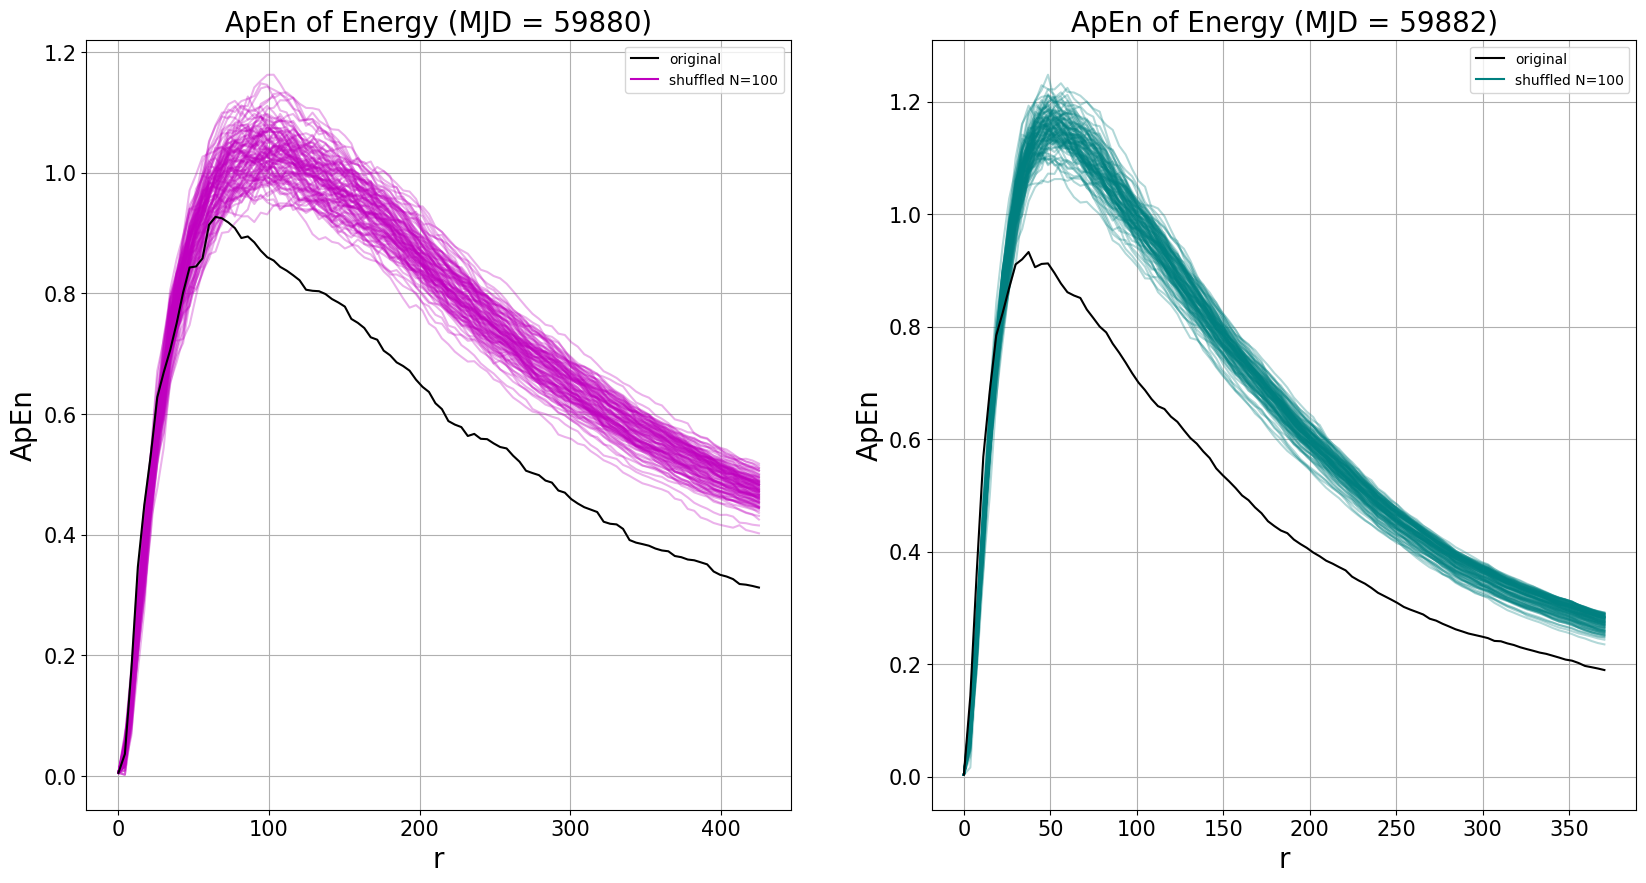

In [113]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(r_E_59880,AdE_result_59880 , c='m', alpha=0.3)
plt.plot(r_E_59880, E_apen_59880, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='m')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Energy (MJD = 59880)',fontsize=20)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r_E_59882,AdE_result_59882 , c='teal', alpha=0.3)
plt.plot(r_E_59882, E_apen_59882, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='teal')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Energy (MJD = 59882)',fontsize=20)
plt.grid(True)

plt.legend()
plt.show()

In [114]:
r_f_59882 = np.linspace(0, np.std(freq_change_59882), 100)
f_apen_59882 = []
for r in r_f_59882:
    f_apen_59882.append(ApEn(freq_change_59882, 2, r))
f_apen_59882 = np.array(f_apen_59882)

In [115]:
r_f_59880 = np.linspace(0, np.std(freq_change_59880), 100)
f_apen_59880 = []
for r in r_f_59880:
    f_apen_59880.append(ApEn(freq_change_59880, 2, r))
f_apen_59880 = np.array(f_apen_59880)

In [116]:
# Adf_result_59882 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(freq_change_59882)
#     apen = [ApEn(freq_change_59882, 2, r) for r in r_f_59882]
#     Adf_result_59882[f'iteration_{i+1}'] = apen
# plt.plot(r_f_59882, Adf_result_59882)
# plt.show()

In [117]:
# Adf_result_59880 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(freq_change_59880)
#     apen = [ApEn(freq_change_59880, 2, r) for r in r_f_59880]
#     Adf_result_59880[f'iteration_{i+1}'] = apen
# plt.plot(r_f_59880, Adf_result_59880)
# plt.show()

In [118]:
# Adf_result_59882.to_csv('Adf_results_59882.csv',index=False)
# Adf_result_59880.to_csv('Adf_results_59880.csv',index=False)

In [119]:
Adf_result_59882 = pd.read_csv('Adf_results_59882.csv')
Adf_result_59880 = pd.read_csv('Adf_results_59880.csv')

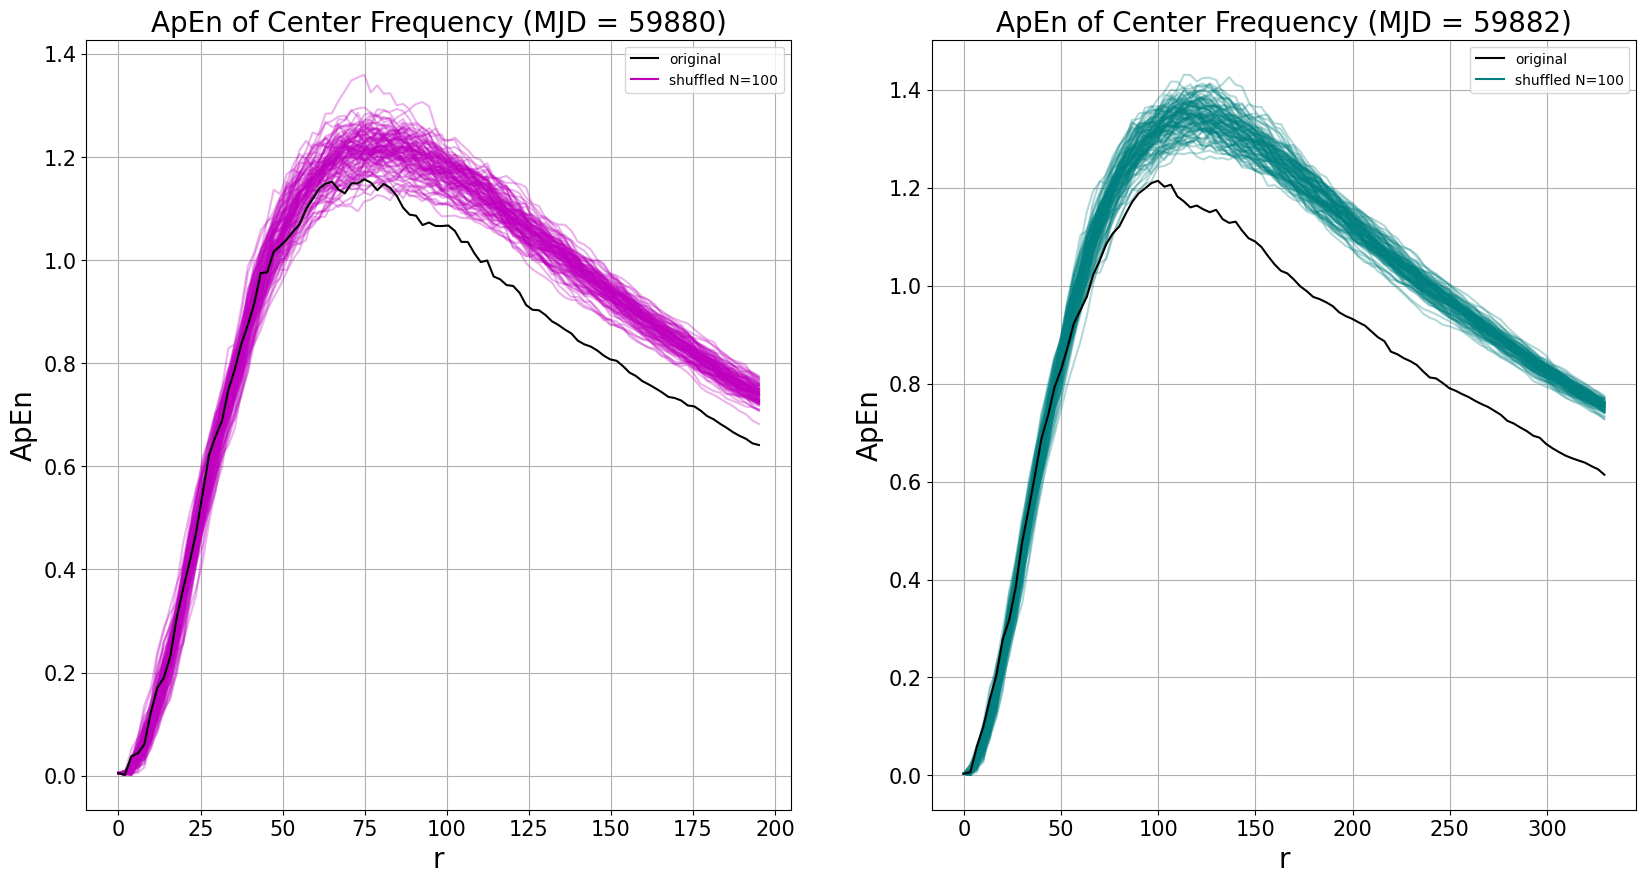

In [120]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(r_f_59880,Adf_result_59880 , c='m', alpha=0.3)
plt.plot(r_f_59880, f_apen_59880, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='m')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Center Frequency (MJD = 59880)',fontsize=20)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r_f_59882,Adf_result_59882 , c='teal', alpha=0.3)
plt.plot(r_f_59882, f_apen_59882, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='teal')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Center Frequency (MJD = 59882)',fontsize=20)
plt.grid(True)

plt.legend()
plt.show()

In [121]:
print("PI waiting time 59882:", PI(wt_apen_59882, Adt_result_59882))
print("PI waiting time 59880:", PI(wt_apen_59880, Adt_result_59880))
print("PI energy 59882:", PI(E_apen_59882, AdE_result_59882))
print("PI energy 59880:", PI(E_apen_59880, AdE_result_59880))
print("PI frequency 59882:", PI(f_apen_59882, Adf_result_59882))
print("PI frequency 59880:", PI(f_apen_59880, Adf_result_59880))

PI waiting time 59882: (0.9611959571122823, 0.02602654700638201)
PI waiting time 59880: (1.0085126229215435, 0.03263626391536898)
PI energy 59882: (0.8027883798013441, 0.022775974150457574)
PI energy 59880: (0.8839155459588686, 0.034279180796482636)
PI frequency 59882: (0.8936584644533458, 0.021020465527918943)
PI frequency 59880: (0.9385192800419446, 0.02770803588092895)
